In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import curvedsky as cs
import binning

In [2]:
sys.path.append('../')

In [3]:
%load_ext autoreload
%autoreload 2
from lbxs4.cmb import CMBLensed
from lbxs4.simulations import LBSky,S4Sky
from lbxs4.filtering import FiltCoadd
from lbxs4.multitracer import CoaddKappa
from lbxs4.delensing import Delenser
from lbxs4.config import *

In [4]:
dire = '/pscratch/sd/l/lonappan/LBxS4'

In [5]:
lb_sky = LBSky(512)
s4_sky = S4Sky()

In [6]:
mask_karg = {'lb_mask':lb_sky.mask,'s4_mask':s4_sky.mask}
kappa  = CoaddKappa(dire,2,1024,512,**mask_karg)

../lbxs4/utils.py:50: RuntimeWarning: invalid value encountered in true_divide
  cls[k][ell[idc]] = cols[i + 1][idc] / we[idc]
../lbxs4/multitracer.py:255: RuntimeWarning: divide by zero encountered in true_divide
  self.INls = np.array( [ 1./self.cov_n[:,:,l].diagonal() for l in range(lmax+1) ] ).T


In [7]:
kappa.masks.keys()

dict_keys(['ks4', 'cib', 'euc1n5', 'euc2n5', 'euc3n5', 'euc4n5', 'euc5n5', 'lss1n5', 'lss2n5', 'lss3n5', 'lss4n5', 'lss5n5'])

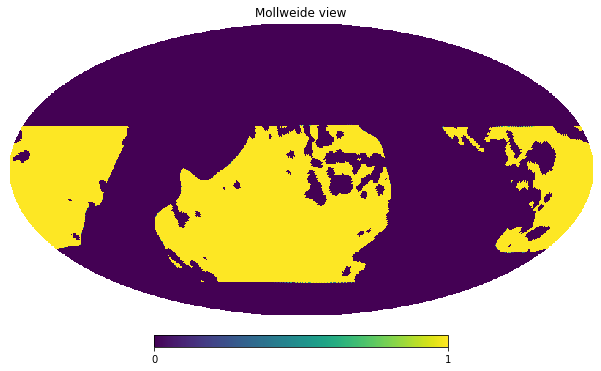

In [15]:
hp.mollview(kappa.masks['cib'])

In [16]:
import time

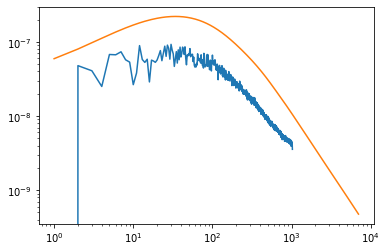

In [17]:
now = time.time()
kappa.plot_coadd(0)
np.savetxt('kappa.txt',np.array([time.time()-now]),fmt='%.2f')